## **Import Libraries and Dataset**

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

import random
import numpy as np

import implementations
from implementations import *
import myhelpers
from myhelpers import *

path_x_train = '../data/dataset/x_train.csv'
path_y_train = '../data/dataset/y_train.csv'
path_x_test = '../data/dataset/x_test.csv'

x_train, headers = load_csv_data(path_x_train)
y_train, headers_y_train = load_csv_data(path_y_train)
x_test, _ = load_csv_data(path_x_test)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)

        

x_train shape: (328135, 322)
y_train shape: (328135, 2)
x_test shape: (109379, 322)


In [128]:
import importlib
import implementations
from implementations import *
import myhelpers
from myhelpers import *
importlib.reload(myhelpers)
importlib.reload(implementations)

<module 'implementations' from '/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project1/ml-project-1-pandas/implementations.py'>

## **Data Pre-Processing**

Filter all features with more than 60% Nan's

In [129]:
x_tr_no_sparse, x_te_no_sparse , headers_no_sparse = filter_features_with_nans(x_train, x_test, headers, nan_threshold=0.60)
x_tr_no_sparse.shape

(328135, 193)

Remove features with very low variancce 

In [130]:
x_tr_no_const, headers_no_const, x_te_no_const = check_variance(x_tr_no_sparse,x_te_no_sparse, headers_no_sparse, 0.05)
x_te_no_const.shape

Removed low variance features: ['IYEAR', '_FRT16', '_VEG23']


(109379, 190)

Create a copy of the data, and replace all outlying variable like 777 9999 and so on

In [131]:
x_copy = replace_values_with_nan(x_tr_no_const, headers_no_const)

Filter the features using mean and std

In [132]:
filtered_x_copy, filtered_headers, mean_diffs, std_ratios= target_feature_selection(x_copy, 
                                y_train[:,1], headers_no_const, 0.1, 1.3)

# np.savetxt('filtered_data.csv', filtered_data_copy, delimiter=',', header=','.join(filtered_headers), comments='', fmt='%s')

/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project1/ml-project-1-pandas/myhelpers.py:248: RuntimeWarning: invalid value encountered in divide
  normalized_data = (data - min_vals) / (max_vals - min_vals)
/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project1/ml-project-1-pandas/myhelpers.py:278: RuntimeWarning: Mean of empty slice
  np.nanmean(normalized_data[target == -1, i]) if np.any(target == -1) else 0,
/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project1/ml-project-1-pandas/myhelpers.py:279: RuntimeWarning: Mean of empty slice
  np.nanmean(normalized_data[target == 1, i]) if np.any(target == 1) else 0
/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project1/ml-project-1-pandas/.venv/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Removed features with low mean difference or out-of-bound standard deviation ratio:
Id: Mean Diff = 0.0026, Std Ratio = 1.0002
_STATE: Mean Diff = 0.0045, Std Ratio = 0.9972
FMONTH: Mean Diff = 0.0074, Std Ratio = 0.9976
IDATE: Mean Diff = 0.0059, Std Ratio = 1.0032
IMONTH: Mean Diff = 0.0067, Std Ratio = 1.0030
IDAY: Mean Diff = 0.0239, Std Ratio = 1.0028
DISPCODE: Mean Diff = 0.0223, Std Ratio = 1.0685
SEQNO: Mean Diff = 0.0315, Std Ratio = 1.1096
_PSU: Mean Diff = 0.0315, Std Ratio = 1.1096
CTELENUM: Mean Diff = nan, Std Ratio = nan
PVTRESD1: Mean Diff = 0.0001, Std Ratio = 0.8064
STATERES: Mean Diff = nan, Std Ratio = nan
CELLFON3: Mean Diff = 0.0199, Std Ratio = 1.0042
NUMADULT: Mean Diff = 0.0083, Std Ratio = 1.0561
NUMMEN: Mean Diff = 0.0025, Std Ratio = 1.0475
NUMWOMEN: Mean Diff = 0.0113, Std Ratio = 0.9507
CTELNUM1: Mean Diff = nan, Std Ratio = nan
CELLFON2: Mean Diff = nan, Std Ratio = nan
CSTATE: Mean Diff = 0.0236, Std Ratio = 1.2208
LANDLINE: Mean Diff = 0.0874, Std Ratio

Import the data types files and segregate different data types using the excel sheet 

In [133]:
filename = "types.csv"
filtered_headers, masked_features = load_headers_extract_features(filename)

In [134]:
x_filtered = filter_dataset1(x_tr_no_const, headers_no_const, filtered_headers)
x_te_filtered = filter_dataset1(x_te_no_const, headers_no_const, filtered_headers)
print(x_filtered)
print(x_filtered.shape)
print(x_te_filtered.shape)

[[ 2.  1.  5. ...  3.  3.  4.]
 [ 4. 88. 88. ...  3.  3.  4.]
 [ 2. 77. 77. ...  2.  2.  3.]
 ...
 [ 3. 88.  1. ...  3.  3.  4.]
 [ 3. 88. 88. ...  3.  3.  4.]
 [ 2.  7.  7. ...  2.  2.  3.]]
(328135, 56)
(109379, 56)


In [135]:
masked_headers_continuous, masked_first_row_continuous, masked_headers_categorical,masked_first_row_categorical, masked_headers_ordinal, masked_first_row_ordinal = variable_type_separation(filename, filtered_headers)
print(masked_headers_continuous)
print(masked_headers_categorical)
print(masked_headers_ordinal)

['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'WEIGHT2', 'HEIGHT3', 'DRNK3GE5', '_LLCPWT', '_AGE80', 'MAXVO2_', 'FC60_', 'PA1VIGM_']
['HLTHPLN1', 'PERSDOC2', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'TOLDHI2', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'CHCKIDNY', 'DIABETE3', 'SEX', 'VETERAN3', 'INTERNET', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'EXERANY2', 'FLUSHOT6', 'PNEUVAC3', '_RFHYPE5', '_CHOLCHK', '_RFCHOL', '_DRDXAR1', '_AGE65YR', 'DRNKANY5', '_RFBING5', '_TOTINDA', '_PA150R2', '_LMTACT1', '_LMTWRK1', '_LMTSCL1']
['GENHLTH', 'CHECKUP1', 'CHOLCHK', '_CHLDCNT', '_INCOMG', 'ACTIN11_']


Remove all Nan's and missing respones (Refused, dont know, blank ...)

In [136]:
x_filtered2 = filter_dataset2(x_filtered, filtered_headers)
x_te_filtered2 = filter_dataset2(x_te_filtered, filtered_headers)
print(x_filtered2.shape)
print(x_te_filtered2.shape)


(328135, 56)
(109379, 56)


In [137]:
#np.savetxt('x_filtered2.csv', x_filtered2, delimiter=',', header=','.join(filtered_headers), comments='', fmt='%s')

Z-score normalization

In [138]:
for header in filtered_headers:
        if header in masked_headers_continuous:
            index = filtered_headers.index(header)
            x_filtered2[:,index] = standardize(x_filtered2[:,index])
            x_te_filtered2[:,index] = standardize(x_te_filtered2[:,index])

Measure highly correlated features (Continous and ordinal)

In [139]:
high_correlation_results = identify_highly_correlated_features(x_filtered2, filtered_headers, masked_headers_continuous,threshold=0.8)
for feature, correlated in high_correlation_results.items():
    print(f"{feature} is highly correlated with: {', '.join(correlated)}")


_AGE80 is highly correlated with: MAXVO2_
MAXVO2_ is highly correlated with: _AGE80


In [140]:
high_correlation_results = identify_highly_correlated_features(x_filtered2, filtered_headers, masked_headers_ordinal,threshold=0.8)
for feature, correlated in high_correlation_results.items():
    print(f"{feature} is highly correlated with: {', '.join(correlated)}")


Measure highly correlated features (Categorical) and remove all redundant info 

In [141]:
categorical_indices = [filtered_headers.index(header) for header in masked_headers_categorical]
x_categorical = x_filtered2[:, categorical_indices]


In [142]:
results_all_pairs = calculate_cramers_v_all_pairs(x_categorical)
print_cramers_v(results_all_pairs,masked_headers_categorical)

Feature             HLTHPLN1            PERSDOC2            BPHIGH4             BPMEDS              BLOODCHO            TOLDHI2             CVDSTRK3            CHCSCNCR            CHCOCNCR            CHCCOPD1            HAVARTH3            CHCKIDNY            DIABETE3            SEX                 VETERAN3            INTERNET            QLACTLM2            USEEQUIP            BLIND               DECIDE              DIFFWALK            DIFFDRES            DIFFALON            SMOKE100            EXERANY2            FLUSHOT6            PNEUVAC3            _RFHYPE5            _CHOLCHK            _RFCHOL             _DRDXAR1            _AGE65YR            DRNKANY5            _RFBING5            _TOTINDA            _PA150R2            _LMTACT1            _LMTWRK1            _LMTSCL1            
HLTHPLN1            0.0000              0.2187              0.0618              0.0761              0.1528              0.1455              0.0167              0.0472              0.0394             

In [143]:
threshold = 0.85
correlated  = get_correlated_features(x_categorical, results_all_pairs, masked_headers_categorical, threshold)

features_to_remove = select_redundant_features(correlated)
features_to_remove.append('_AGE80')
print(features_to_remove )


['_CHOLCHK', '_RFHYPE5', '_TOTINDA', '_DRDXAR1', '_PA150R2', '_RFCHOL', '_AGE80']


In [144]:

# Identify columns to keep (i.e., not in the redundant features)
columns_to_keep = [i for i in range(x_filtered2.shape[1]) if filtered_headers[i] not in features_to_remove]

# Return the filtered dataset
x_filtered2= x_filtered2[:, columns_to_keep]
x_te_filtered2=x_te_filtered2[:, columns_to_keep]
print(x_filtered2.shape)
print(x_te_filtered2.shape)

(328135, 49)
(109379, 49)


In [145]:
# Remove features from masked_headers_categorical
filtered_headers = [
    header for header in filtered_headers if header not in features_to_remove
]
print(filtered_headers)

['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'CHCKIDNY', 'DIABETE3', 'SEX', 'VETERAN3', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'DRNK3GE5', 'EXERANY2', 'FLUSHOT6', 'PNEUVAC3', '_LLCPWT', '_AGE65YR', '_CHLDCNT', '_INCOMG', 'DRNKANY5', '_RFBING5', 'MAXVO2_', 'FC60_', 'ACTIN11_', 'PA1VIGM_', '_LMTACT1', '_LMTWRK1', '_LMTSCL1']


One hot encoded the categorical features 

In [146]:
import numpy as np

def one_hot_encode_batches(X, headers, masked_headers_categorical, batch_size=1000):
    """
    One-hot encodes the categorical columns in the dataset in batches.

    Args:
        X (np.ndarray): The original dataset.
        headers (list): List of feature names corresponding to columns in X.
        masked_headers_categorical (list): List of headers for categorical features to encode.
        batch_size (int): Number of rows to process at a time.

    Returns:
        np.ndarray: The one-hot encoded dataset.
    """
    num_rows = X.shape[0]
    unique_values_dict = {}

    # Step 1: Collect unique values for categorical features
    for i, header in enumerate(headers):
        if header in masked_headers_categorical:
            unique_values_dict[i] = set()  # Use a set to collect unique values

    # First pass to gather all unique values
    for start in range(0, num_rows, batch_size):
        end = min(start + batch_size, num_rows)
        batch = X[start:end]
        
        for i in range(batch.shape[1]):
            if headers[i] in masked_headers_categorical:
                unique_values_dict[i].update(np.unique(batch[:, i]))

    # Convert sets to sorted lists for consistent ordering
    for key in unique_values_dict:
        unique_values_dict[key] = sorted(unique_values_dict[key])

    # Step 2: One-hot encode based on collected unique values
    processed_data = []
    
    for start in range(0, num_rows, batch_size):
        end = min(start + batch_size, num_rows)
        batch = X[start:end]
        batch_processed_data = []

        for i in range(batch.shape[1]):
            if headers[i] in masked_headers_categorical:
                unique_vals = unique_values_dict[i]
                one_hot_col = np.zeros((batch.shape[0], len(unique_vals)), dtype=int)

                for j, val in enumerate(unique_vals):
                    one_hot_col[:, j] = (batch[:, i] == val).astype(int)

                batch_processed_data.append(one_hot_col)
            else:
                batch_processed_data.append(batch[:, i].reshape(-1, 1).astype(float))

        # Concatenate the processed batch columns and append to the main data
        processed_data.append(np.hstack(batch_processed_data))

    # Concatenate all processed batches into a single array
    encoded_data = np.vstack(processed_data)

    return encoded_data


In [147]:
test_encoded_data=one_hot_encode_batches(x_te_filtered2,filtered_headers,masked_headers_categorical,batch_size=1000)
test_encoded_data.shape

(109379, 123)

In [148]:
encoded_data  =one_hot_encode_batches(x_filtered2, filtered_headers, masked_headers_categorical,batch_size=1000)
test_encoded_data=one_hot_encode_batches(x_te_filtered2,filtered_headers,masked_headers_categorical,batch_size=1000 )

In [149]:
# np.savetxt('test_encoded_data.csv', test_encoded_data, delimiter=',', header=','.join(filtered_headers), comments='', fmt='%s')
# np.savetxt('encoded_data2.csv', encoded_data, delimiter=',', header=','.join(filtered_headers), comments='', fmt='%s')

## **Model Building**

Transform all -1 to 0 

In [150]:
print(y_train.shape)
y_train[y_train == -1] = 0

# Print the modified shape and content
print(y_train.shape)
print(y_train)


(328135, 2)
(328135, 2)
[[0.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00]
 [2.00000e+00 0.00000e+00]
 ...
 [3.28132e+05 0.00000e+00]
 [3.28133e+05 0.00000e+00]
 [3.28134e+05 0.00000e+00]]


In [151]:
# Assuming x_filtered2 and x_te_filtered2 are your feature matrices
# Add bias term to the feature matrix x_filtered2
ones2 = np.ones((encoded_data.shape[0], 1))  # Column of ones for x_filtered2
tx = np.hstack((ones2, encoded_data))  # Concatenate ones as the first column

# Add bias term to the feature matrix x_te_filtered2
ones_test2 = np.ones((test_encoded_data.shape[0], 1))  # Column of ones for x_te_filtered2
tx_test = np.hstack((ones_test2, test_encoded_data))  # Concatenate ones as the first column

In [152]:
# Function for custom train/test split
def custom_train_test_split(features, labels, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(features.shape[0])
    np.random.shuffle(indices)
    
    split_idx = int(features.shape[0] * (1 - test_size))
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]
    
    return features[train_indices], features[test_indices], labels[train_indices], labels[test_indices]

# Train/test split
features_train, features_val, labels_train, labels_val = custom_train_test_split(tx, y_train[:, 1], test_size=0.2, random_state=42)

# Function to calculate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    return np.sum(true_labels == predicted_labels) / len(true_labels)

# Function to calculate F1 Score
def calculate_f1_score(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [157]:

# Train the model with the best parameters found
initial_w = np.zeros(features_train.shape[1])
best_lambda = 0  # Set the lambda value you wish to test

# Train the model
w, losses, test_losses = logistic_regression_medical(
                labels_train,
                features_train,
                labels_val,
                features_val,
                initial_w,
                gamma=0.1,
                batch_size=3000,
                lambda_=0,
                patience=3)



No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 3 iterations.
Early stopping at iteration 25, test loss increased from 0.2256312193492117 to 0.2256391160714403.


In [158]:
# Assuming you have already defined pred_val and the actual labels

# Define the range of thresholds to test
thresholds = np.linspace(0.01, 0.99, 99)  # 99 threshold values between 0.01 and 0.99

# Initialize lists to store results
results = []

pred_val=sigmoid(features_val @ w)

# Loop through each threshold value
for threshold in thresholds:
    # Convert predicted probabilities to binary labels using the current threshold
    predicted_labels = (pred_val > threshold).astype(int)
    
    # Calculate F1 Score and Accuracy
    f1 = calculate_f1_score(labels_val, predicted_labels)
    accuracy = calculate_accuracy(labels_val, predicted_labels)
    
    # Store results for the current threshold
    results.append((threshold, f1, accuracy))

# Print the results
for threshold, f1, accuracy in results:
    print(f"Threshold: {threshold:.2f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

# Optional: Find the best threshold based on F1 Score
best_threshold = max(results, key=lambda x: x[1])[0]  # Get the threshold with the highest F1 Score
print(f"Best Threshold: {best_threshold:.2f}")


Threshold: 0.01, F1 Score: 0.1990, Accuracy: 0.2828
Threshold: 0.02, F1 Score: 0.2388, Accuracy: 0.4399
Threshold: 0.03, F1 Score: 0.2676, Accuracy: 0.5291
Threshold: 0.04, F1 Score: 0.2922, Accuracy: 0.5921
Threshold: 0.05, F1 Score: 0.3111, Accuracy: 0.6379
Threshold: 0.06, F1 Score: 0.3293, Accuracy: 0.6755
Threshold: 0.07, F1 Score: 0.3455, Accuracy: 0.7062
Threshold: 0.08, F1 Score: 0.3597, Accuracy: 0.7316
Threshold: 0.09, F1 Score: 0.3713, Accuracy: 0.7530
Threshold: 0.10, F1 Score: 0.3817, Accuracy: 0.7711
Threshold: 0.11, F1 Score: 0.3912, Accuracy: 0.7870
Threshold: 0.12, F1 Score: 0.4001, Accuracy: 0.8007
Threshold: 0.13, F1 Score: 0.4069, Accuracy: 0.8129
Threshold: 0.14, F1 Score: 0.4118, Accuracy: 0.8235
Threshold: 0.15, F1 Score: 0.4170, Accuracy: 0.8330
Threshold: 0.16, F1 Score: 0.4221, Accuracy: 0.8416
Threshold: 0.17, F1 Score: 0.4255, Accuracy: 0.8490
Threshold: 0.18, F1 Score: 0.4273, Accuracy: 0.8557
Threshold: 0.19, F1 Score: 0.4284, Accuracy: 0.8618
Threshold: 0

In [123]:
# Assuming x_filtered2 and x_te_filtered2 are your feature matrices
# Add bias term to the feature matrix x_filtered2
ones2 = np.ones((x_filtered2.shape[0], 1))  # Column of ones for x_filtered2
tx = np.hstack((ones2, x_filtered2))  # Concatenate ones as the first column

# Add bias term to the feature matrix x_te_filtered2
ones_test2 = np.ones((x_te_filtered2.shape[0], 1))  # Column of ones for x_te_filtered2
tx_test = np.hstack((ones_test2, x_te_filtered2))  # Concatenate ones as the first column


In [ ]:
# Assuming x_filtered2 and x_te_filtered2 are your feature matrices
# Add bias term to the feature matrix x_filtered2
ones2 = np.ones((x_filtered2.shape[0], 1))  # Column of ones for x_filtered2
tx = np.hstack((ones2, x_filtered2))  # Concatenate ones as the first column

# Add bias term to the feature matrix x_te_filtered2
ones_test2 = np.ones((x_te_filtered2.shape[0], 1))  # Column of ones for x_te_filtered2
tx_test = np.hstack((ones_test2, x_te_filtered2))  # Concatenate ones as the first column

# Function for custom train/test split
def custom_train_test_split(features, labels, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    indices = np.arange(features.shape[0])
    np.random.shuffle(indices)
    
    split_idx = int(features.shape[0] * (1 - test_size))
    train_indices, test_indices = indices[:split_idx], indices[split_idx:]
    
    return features[train_indices], features[test_indices], labels[train_indices], labels[test_indices]

# Train/test split
features_train, features_val, labels_train, labels_val = custom_train_test_split(tx, y_train[:, 1], test_size=0.2, random_state=42)

# Function to calculate accuracy
def calculate_accuracy(true_labels, predicted_labels):
    return np.sum(true_labels == predicted_labels) / len(true_labels)

# Function to calculate F1 Score
def calculate_f1_score(true_labels, predicted_labels):
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
import numpy as np

# Example gamma values, diverse batch sizes, and patience values
gamma_values = [0.3, 0.4, 0.5 ]
batch_sizes = [100, 500, 1000, 2000, 4000, 8000, 10000, 100000]  # Smaller and larger batch sizes
patience_values = [3, 4]  # Different patience values

# Define the range of thresholds to test for the best F1 score
thresholds = np.linspace(0.01, 0.99, 99)  # 99 threshold values between 0.01 and 0.99

# Initialize a list to store results
results = []

# Iterate over all combinations of parameters
for gamma in gamma_values:
    for batch_size in batch_sizes:
        for patience in patience_values:
            print(f"Training with gamma: {gamma}, batch_size: {batch_size}, patience: {patience}")
            
            # Train the model and get the losses
            w, losses, test_losses = logistic_regression_medical(
                labels_train,
                features_train,
                labels_val,
                features_val,
                initial_w,
                gamma=gamma,
                batch_size=batch_size,
                lambda_=0,
                patience=patience
            )
            
            # Get the model's validation predictions (pred_val)
            pred_val = sigmoid(features_val @ w)  # Compute predictions using the sigmoid function

            # Test multiple thresholds to find the best F1 for this model
            best_f1 = 0
            best_threshold = 0
            for threshold in thresholds:
                predicted_labels = (pred_val > threshold).astype(int)
                f1 = calculate_f1_score(labels_val, predicted_labels)
                
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold

            # Store the results for this parameter combination
            results.append({
                'gamma': gamma,
                'batch_size': batch_size,
                'patience': patience,
                'best_f1': best_f1,
                'best_threshold': best_threshold
            })

# Find the best parameter combination based on F1 Score
best_result = max(results, key=lambda x: x['best_f1'])
print(f"Best combination: gamma = {best_result['gamma']}, batch_size = {best_result['batch_size']}, patience = {best_result['patience']}")
print(f"Best F1 Score: {best_result['best_f1']:.4f} at threshold {best_result['best_threshold']:.2f}")


Training with gamma: 0.3, batch_size: 100, patience: 3
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 3 iterations.
Early stopping at iteration 5, test loss increased from 0.3353033254991851 to 0.40986457456787284.
Training with gamma: 0.3, batch_size: 100, patience: 4
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 3 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 1 iterations.
No improvement for 1 iterations.
No improvement for 2 iterations.
No improvement for 3 iterations.
No improvement for 1 iterations.

KeyboardInterrupt: 

In [ ]:
import pandas as pd


# Find the best parameter combination based on F1 Score
best_result = max(results, key=lambda x: x['best_f1'])
print(f"\nBest combination: gamma = {best_result['gamma']}, batch_size = {best_result['batch_size']}, patience = {best_result['patience']}")
print(f"Best F1 Score: {best_result['best_f1']:.4f} at threshold {best_result['best_threshold']:.2f}")

# Create a DataFrame for a nicer display of results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print("\nResults Summary:")
print(results_df.sort_values(by='best_f1', ascending=False).reset_index(drop=True))


Best combination: gamma = 0.3, batch_size = 4000, patience = 4
Best F1 Score: 0.4215 at threshold 0.34

Results Summary:
    gamma  batch_size  patience   best_f1  best_threshold
0     0.3        4000         4  0.421526            0.34
1     0.3       10000         4  0.421484            0.38
2     0.3        2000         3  0.421327            0.50
3     0.1         100         3  0.420784            0.34
4     0.3        1000         4  0.420477            0.53
5     0.2        2000         3  0.420261            0.26
6     0.1        2000         4  0.420087            0.20
7     0.2        4000         3  0.419987            0.22
8     0.2       10000         4  0.419969            0.21
9     0.2        4000         4  0.419933            0.22
10    0.2       10000         3  0.419861            0.22
11    0.1         500         4  0.419792            0.60
12    0.1        4000         4  0.419645            0.19
13    0.2         500         3  0.419585            0.62
14    0.

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style, init

# Initialize colorama
init(autoreset=True)# Find the best parameter combination based on F1 Score
best_result = max(results, key=lambda x: x['best_f1'])
print(f"\n{Fore.GREEN}Best combination: gamma = {best_result['gamma']}, "
      f"batch_size = {best_result['batch_size']}, patience = {best_result['patience']}")
print(f"{Fore.YELLOW}Best F1 Score: {best_result['best_f1']:.4f} at threshold {best_result['best_threshold']:.2f}")

# Create a DataFrame for a nicer display of results
results_df = pd.DataFrame(results)

# Print the results DataFrame with colors
print("\nResults Summary:")
print(tabulate(
    results_df.sort_values(by='best_f1', ascending=False).reset_index(drop=True),
    headers='keys',
    tablefmt='pretty',
    showindex=False,
    numalign="center",
    stralign="center"
))


Best combination: gamma = 0.3, batch_size = 4000, patience = 4
Best F1 Score: 0.4215 at threshold 0.34

Results Summary:
+-------+------------+----------+----------------------+----------------------+
| gamma | batch_size | patience |       best_f1        |    best_threshold    |
+-------+------------+----------+----------------------+----------------------+
|  0.3  |   4000.0   |   4.0    |  0.4215264187866928  |         0.34         |
|  0.3  |  10000.0   |   4.0    |  0.4214837814626412  |         0.38         |
|  0.3  |   2000.0   |   3.0    |  0.4213271117820627  |         0.5          |
|  0.1  |   100.0    |   3.0    |  0.4207836456558774  |         0.34         |
|  0.3  |   1000.0   |   4.0    |  0.4204772696973737  |         0.53         |
|  0.2  |   2000.0   |   3.0    | 0.42026143790849674  |         0.26         |
|  0.1  |   2000.0   |   4.0    | 0.42008728100689396  |         0.2          |
|  0.2  |   4000.0   |   3.0    |  0.4199871877001922  |         0.22         

In [ ]:
y.shape

(328135, 50)

In [124]:
initial_w = np.zeros(y_train.shape[1])

w, train_losses= logistic_regression_no_early_stopping(y_train[:,1], tx, initial_w, gamma=0.01, batch_size=3000, lambda_=0.0, max_iter=230)

y_test = np.zeros((x_test.shape[0],2))

y_test[:,0] = x_test[:,0]
#np.savetxt('y_test.csv', y_test, delimiter=',', comments='', fmt='%s')


# Assuming tx_test is your test feature set and w is your weight vector
y_test[:, 1] = sigmoid(tx_test @ w)  # Compute predictions using the sigmoid function
y_test[:, 1] = (y_test[:, 1] > 0.195).astype(int)  # Convert probabilities to binary outcomes

# Convert 0s to -1s in y_test
for i in range(len(y_test)):
    if y_test[i, 1] == 0:
        y_test[i, 1] = -1

print(y_test)

np.savetxt('y_test.csv', y_test, delimiter=',', comments='', fmt='%s')


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 50)

Sorted Headers with Mean Differences:
CTELENUM: Mean Diff = nan
STATERES: Mean Diff = nan
CTELNUM1: Mean Diff = nan
CELLFON2: Mean Diff = nan
_RFHYPE5: Mean Diff = 0.3762
_RFHLTH: Mean Diff = 0.3220
PNEUVAC3: Mean Diff = 0.3111
TOLDHI2: Mean Diff = 0.2998
_RFCHOL: Mean Diff = 0.2998
DIFFWALK: Mean Diff = 0.2880
QLACTLM2: Mean Diff = 0.2846
HAVARTH3: Mean Diff = 0.2805
_DRDXAR1: Mean Diff = 0.2805
BPHIGH4: Mean Diff = 0.2502
_LMTACT1: Mean Diff = 0.2413
GENHLTH: Mean Diff = 0.2380
_AGE_G: Mean Diff = 0.2265
_AGE80: Mean Diff = 0.2177
USEEQUIP: Mean Diff = 0.2176
INTERNET: Mean Diff = 0.2128
_AGEG5YR: Mean Diff = 0.2075
PHYSHLTH: Mean Diff = 0.2057
_LMTWRK1: Mean Diff = 0.2016
POORHLTH: Mean Diff = 0.1963
_LMTSCL1: Mean Diff = 0.1921
SMOKE100: Mean Diff = 0.1897
CHCCOPD1: Mean Diff = 0.1795
_AGE65YR: Mean Diff = 0.1654
DRNKANY5: Mean Diff = 0.1566
_INCOMG: Mean Diff = 0.1547
MAXVO2_: Mean Diff = 0.1454
FC60_: Mean Diff = 0.1454
CVDSTRK3: Mean Diff = 0.1446
VETERAN3: Mean Diff = 0.1425
DI

ValueError: Axis limits cannot be NaN or Inf

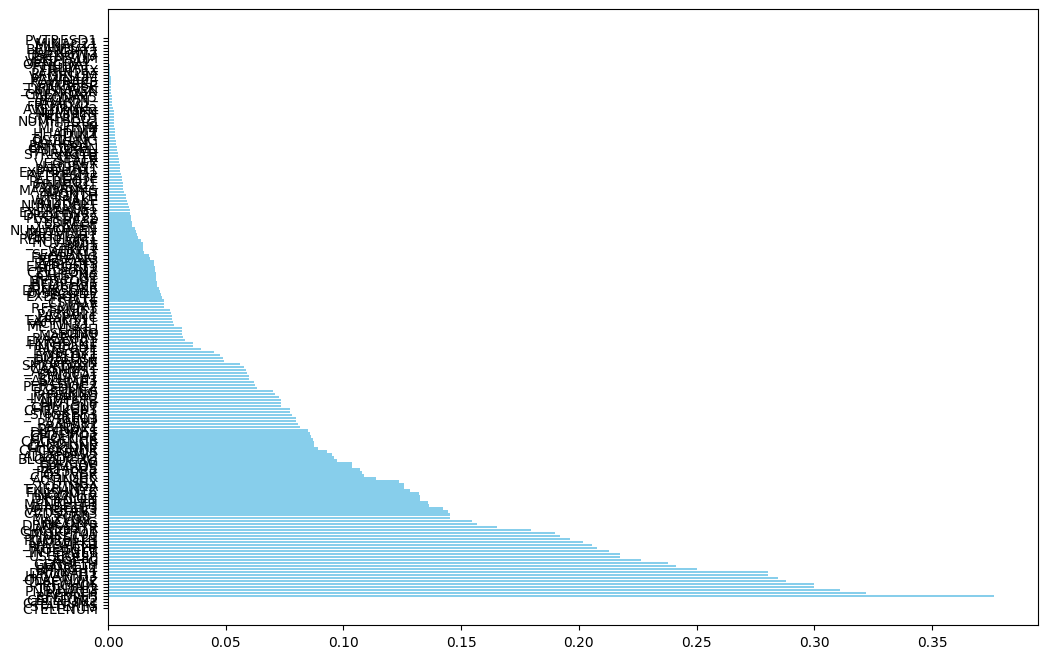

In [ ]:

# Sort mean differences
sorted_mean_diffs = dict(sorted(mean_diffs.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
headers_plot = list(sorted_mean_diffs.keys())
mean_diffs_plot = list(sorted_mean_diffs.values())

# Print sorted headers and their corresponding mean differences
print("Sorted Headers with Mean Differences:")
for header, mean_diff in sorted_mean_diffs.items():
    print(f"{header}: Mean Diff = {mean_diff:.4f}")

# Define threshold
threshold = 0.05

# Set x-limit around the threshold
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.barh(headers_plot, mean_diffs_plot, color='skyblue')

# Set x-limits around the threshold
plt.xlim(threshold - 0.05, max(mean_diffs_plot) + 0.05)  # Adjust limits as needed

# Draw the threshold line
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')

# Hide y-axis labels for cleaner appearance
plt.yticks([])

# Improve aesthetics
plt.xlabel('Mean Difference')
plt.title('Mean Differences of Features Based on Target Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Assuming x_filtered and x_test are your NumPy arrays

# Print unique values for x_filtered
print("Unique values in x_filtered:")
for i in range(x_filtered2.shape[1]):
    unique_vals = np.unique(x_filtered2[:, i])
    print(f"Column {i} ({filtered_headers[i]}): {unique_vals}")

# Print unique values for x_test
print("\nUnique values in x_test:")
for i in range(x_te_filtered2.shape[1]):
    unique_vals = np.unique(x_te_filtered2[:, i])
    print(f"Column {i} ({filtered_headers[i]}): {unique_vals}")


Unique values in x_filtered:
Column 0 (GENHLTH): [0. 1. 2. 3. 4. 5.]
Column 1 (PHYSHLTH): [-1.61093714e+00 -1.46084334e+00 -1.31074954e+00 -1.16065574e+00
 -1.01056193e+00 -8.60468130e-01 -7.10374327e-01 -5.60280525e-01
 -4.10186722e-01 -2.60092919e-01 -1.09999117e-01  2.66620153e-16
  4.00946858e-02  1.90188488e-01  3.40282291e-01  4.90376094e-01
  6.40469896e-01  7.90563699e-01  9.40657501e-01  1.09075130e+00
  1.24084511e+00  1.39093891e+00  1.54103271e+00  1.69112651e+00
  1.84122032e+00  1.99131412e+00  2.14140792e+00  2.29150172e+00
  2.44159553e+00  2.59168933e+00  2.74178313e+00]
Column 2 (MENTHLTH): [-1.72038283e+00 -1.54469403e+00 -1.36900522e+00 -1.19331641e+00
 -1.01762760e+00 -8.41938797e-01 -6.66249990e-01 -4.90561183e-01
 -3.14872376e-01 -1.39183569e-01 -3.12086014e-16  3.65052377e-02
  2.12194045e-01  3.87882852e-01  5.63571659e-01  7.39260466e-01
  9.14949273e-01  1.09063808e+00  1.26632689e+00  1.44201569e+00
  1.61770450e+00  1.79339331e+00  1.96908211e+00  2.1447709

In [ ]:
import numpy as np

# Assuming x_filtered2 and x_te_filtered2 are your NumPy arrays
# Assuming filtered_headers and masked_headers_continuous are defined

# Print unique values for x_filtered2 based on masked_headers_continuous
print("Unique values in x_filtered2 (continuous features):")
for i, header in enumerate(filtered_headers):
    if header in masked_headers_categorical:
        unique_vals = np.unique(x_filtered2[:, i])
        print(f"Column {i} ({header}): {unique_vals}")

# Print unique values for x_te_filtered2 based on masked_headers_continuous
print("\nUnique values in x_te_filtered2 (continuous features):")
for i, header in enumerate(filtered_headers):
    if header in masked_headers_categorical:
        unique_vals = np.unique(x_te_filtered2[:, i])
        print(f"Column {i} ({header}): {unique_vals}")


Unique values in x_filtered2 (continuous features):
Column 4 (HLTHPLN1): [0. 1. 2.]
Column 5 (PERSDOC2): [0. 1. 2. 3.]
Column 7 (BPHIGH4): [0. 1. 2. 3. 4.]
Column 8 (BPMEDS): [0. 1. 2.]
Column 9 (BLOODCHO): [0. 1. 2.]
Column 11 (TOLDHI2): [0. 1. 2.]
Column 12 (CVDSTRK3): [0. 1. 2.]
Column 13 (CHCSCNCR): [0. 1. 2.]
Column 14 (CHCOCNCR): [0. 1. 2.]
Column 15 (CHCCOPD1): [0. 1. 2.]
Column 16 (HAVARTH3): [0. 1. 2.]
Column 17 (CHCKIDNY): [0. 1. 2.]
Column 18 (DIABETE3): [0. 1. 2. 3. 4.]
Column 19 (SEX): [1. 2.]
Column 20 (VETERAN3): [0. 1. 2.]
Column 21 (INTERNET): [0. 1. 2.]
Column 24 (QLACTLM2): [0. 1. 2.]
Column 25 (USEEQUIP): [0. 1. 2.]
Column 26 (BLIND): [0. 1. 2.]
Column 27 (DECIDE): [0. 1. 2.]
Column 28 (DIFFWALK): [0. 1. 2.]
Column 29 (DIFFDRES): [0. 1. 2.]
Column 30 (DIFFALON): [0. 1. 2.]
Column 31 (SMOKE100): [0. 1. 2.]
Column 33 (EXERANY2): [0. 1. 2.]
Column 34 (FLUSHOT6): [0. 1. 2.]
Column 35 (PNEUVAC3): [0. 1. 2.]
Column 37 (_AGE65YR): [1. 2. 3.]
Column 40 (DRNKANY5): [0. 1. 2.

In [ ]:
final_w, train_losses, test_losses = logistic_regression_medical(y_train, tx_train, y_test, tx_test, initial_w, gamma, batch_size=batch_size)